In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img

In [ ]:
from zipfile import ZipFile
!unzip "BanglaLekha-Isolated.zip"

Archive:  /content/drive/My Drive/Data Set from Wahid/BanglaLekha-Isolated.zip
   creating: BanglaLekha-Isolated/
  inflating: BanglaLekha-Isolated/Form-based Marking.xlsx  
  inflating: BanglaLekha-Isolated/Readme.txt  
   creating: BanglaLekha-Isolated/test/
   creating: BanglaLekha-Isolated/test/1/
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_08_0916_1990_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1913_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1917_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1918_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1919_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1920_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1922_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1923_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_0_11_0916_1924_1.png  
  inflating: BanglaLekha-Isolated/test/1/01_0001_

In [ ]:
dir = 'BanglaLekha-Isolated'

In [ ]:

train_dir = os.path.join(dir,'train')
test_dir = os.path.join(dir,'test')

CATEGORIES = []
i = 1
while(i<85):
    CATEGORIES.append(i)
    i= i+1
CATEGORIES=list(map(str,CATEGORIES))
print(CATEGORIES)

train_dataset_size = 0
test_dataset_size = 0

['1', '2', '3', '4', '5']


In [ ]:
for i in CATEGORIES:
    train_dataset_size += len(os.listdir(os.path.join(train_dir, i)))
    test_dataset_size += len(os.listdir(os.path.join(test_dir, i)))

print(train_dataset_size,test_dataset_size)

1518 1518


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255)

training_datagen = train_image_generator.flow_from_directory(batch_size=32, directory=train_dir, shuffle=True, target_size=(224, 224), class_mode='categorical')

testing_datagen = validation_image_generator.flow_from_directory(batch_size=32, directory=test_dir, shuffle=True, target_size=(224, 224), class_mode='categorical')

Found 1518 images belonging to 5 classes.
Found 1518 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(84, activation='softmax')
])

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(training_datagen, steps_per_epoch=train_dataset_size//32, epochs=75, validation_data=testing_datagen, validation_steps=test_dataset_size//32)
model.save("graph.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

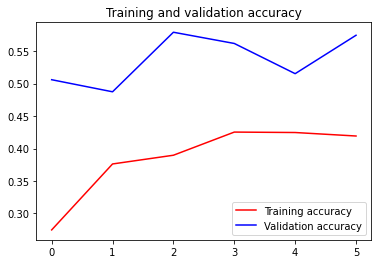

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
img = load_img('1.png')
#print(model.predict(img))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(classes)

[[0. 1. 0. 0. 0.]]


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
img = load_img('1_1.png')
#print(model.predict(img))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(classes)

[[0. 1. 0. 0. 0.]]


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
img = load_img('2.png')
#print(model.predict(img))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(classes)

[[0. 1. 0. 0. 0.]]


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
img = load_img('5.png')
#print(model.predict(img))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(classes)

[[0. 0. 0. 0. 1.]]
